In [150]:
import numpy as np 
from sklearn.datasets import make_classification 
import pandas as pd 
import matplotlib.pyplot as plt 

In [151]:
x , y = make_classification(n_samples = 100 , n_features = 2 , n_informative = 1 ,n_redundant = 0 ,  n_classes = 2 , n_clusters_per_class = 1 , random_state = 41 , hypercube = False , class_sep = 20)

In [152]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty=None , solver='sag')
lr.fit(x,y)

c:\Users\Sachin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [153]:
lr.coef_

array([[4.83274745, 0.22292541]])

In [154]:
re = lr.intercept_
res = lr.coef_
m = -res[0][0]/res[0][1]
b =- re[0]/res[0][1]

x_test = np.linspace(-3, 3, 100)
y_pred_scikit = x_test * m + b

In [155]:
df = pd.DataFrame({'A' : [10 , 20 , 30]})
df.squeeze().shape

(3,)

In [156]:
print(df.values)
print(df.values.shape)

[[10]
 [20]
 [30]]
(3, 1)


In [157]:
x.shape

(100, 2)

In [158]:
def sigmoid(x) : 
    return 1 / (1 + np.exp(-x))

In [159]:
class batchGradient : 
    def __init__(self , epoch = 7000 , learning_rate = 0.5) : 
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.weights = None 
    def fit(self , x , y) : 
        x = np.insert(x , 0 , 1, axis = 1)
        self.weights = np.ones(x.shape[1])

        for i in range(self.epoch) : 
            y_hat = sigmoid(np.dot(x , self.weights))
            self.weights = self.weights + self.learning_rate * np.dot((y-y_hat) , x) / x.shape[0]


In [160]:
bg = batchGradient()
bg.fit(x , y)
slope = - bg.weights[1] / bg.weights[2]
intercept = - bg.weights[0] / bg.weights[2] 

In [161]:
y_pred_batchGradient = x_test * slope + intercept

(-3.0, 3.0)

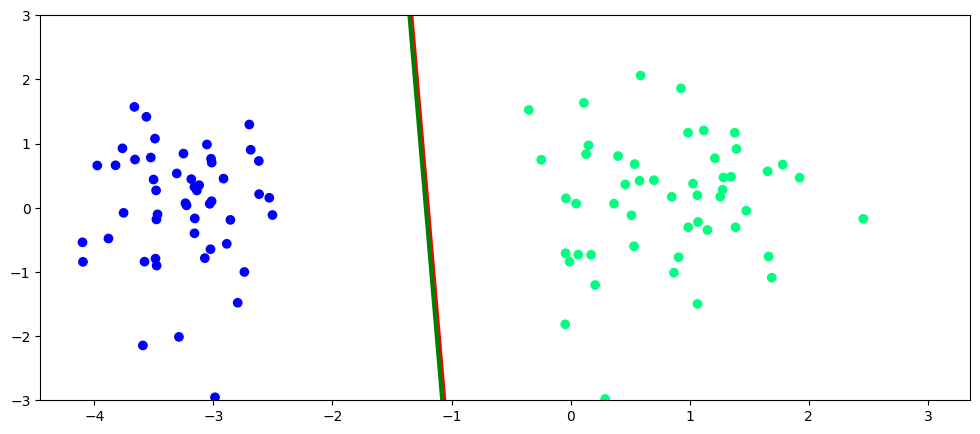

In [162]:
plt.figure(figsize=(12,5))
plt.scatter(x[: , 0] , x[: , 1], cmap='winter' , c = y)
plt.plot(x_test ,  y_pred_scikit , linewidth = 3 , color = 'red')
plt.plot(x_test , y_pred_batchGradient , linewidth = 3 	, color = 'green')
plt.ylim(-3 , 3)